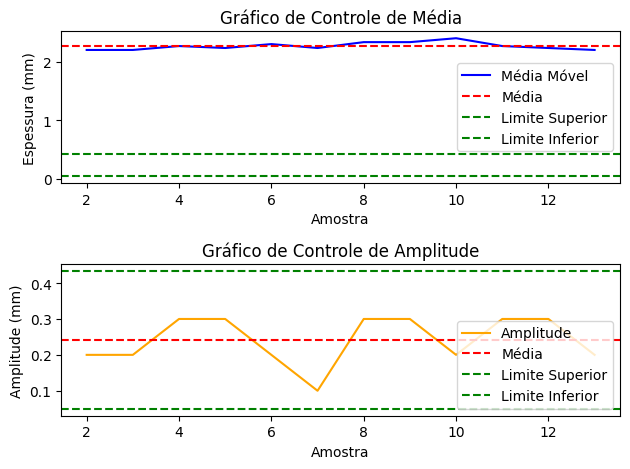

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular média móvel ponderada
def calcular_media_movel_ponderada(data, n):
    weights = np.ones(n) / n
    return np.convolve(data, weights, mode='valid')

# Função para plotar o gráfico de controle de média e amplitude
def plotar_grafico_controle(data, n):
    # Calcular a média móvel ponderada
    media_movel = calcular_media_movel_ponderada(data, n)

    # Calcular a amplitude móvel
    amplitude = [max(data[i:i+n]) - min(data[i:i+n]) for i in range(len(data)-n+1)]

    # Definir limites de controle (3 desvios padrão)
    lim_superior = np.mean(amplitude) + 3 * np.std(amplitude)
    lim_inferior = np.mean(amplitude) - 3 * np.std(amplitude)

    # Plotar o gráfico de controle de média
    plt.subplot(2, 1, 1)
    plt.plot(range(n-1, len(data)), media_movel, color='blue', label='Média Móvel')
    plt.axhline(np.mean(media_movel), color='red', linestyle='--', label='Média')
    plt.axhline(lim_superior, color='green', linestyle='--', label='Limite Superior')
    plt.axhline(lim_inferior, color='green', linestyle='--', label='Limite Inferior')
    plt.xlabel('Amostra')
    plt.ylabel('Espessura (mm)')
    plt.title('Gráfico de Controle de Média')
    plt.legend()

    # Plotar o gráfico de controle de amplitude
    plt.subplot(2, 1, 2)
    plt.plot(range(n-1, len(data)), amplitude, color='orange', label='Amplitude')
    plt.axhline(np.mean(amplitude), color='red', linestyle='--', label='Média')
    plt.axhline(lim_superior, color='green', linestyle='--', label='Limite Superior')
    plt.axhline(lim_inferior, color='green', linestyle='--', label='Limite Inferior')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude (mm)')
    plt.title('Gráfico de Controle de Amplitude')
    plt.legend()

    # Exibir os gráficos
    plt.tight_layout()
    plt.show()

# Dados de exemplo (espessura das peças de metal)
dados_espessura = [2.1, 2.2, 2.3, 2.1, 2.4, 2.2, 2.3, 2.2, 2.5, 2.3, 2.4, 2.1, 2.2, 2.3]

# Tamanho da amostra para o cálculo da média móvel ponderada
tamanho_amostra = 3

# Plotar o gráfico de controle
plotar_grafico_controle(dados_espessura, tamanho_amostra)
